In [1]:
!pip install pyeda
!pip install ipython
from pyeda.inter import *
#from pyeda.inter import expr, espresso
import graphviz
from graphviz import Digraph
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import Source

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.8/486.8 kB 7.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyeda: filename=pyeda-0.29.0-cp310-cp310-linux_x86_64.whl size=246278 sha256=47a06edbeac4b619b8e69ecf50c46d4b58ad05e8e5448d1365be712c2c80aa30
  Stored in directory: /root/.cache/pip/wheels/29/48/ee/7d9b6709dc5157bde3c6766c9ff53fad190c3fb597a5f6e53b
Successfully built pyeda


project #2

In [9]:
# req3:ROBDD constructor
def draw(f):
    f=expr(f)
    #Convert to BDD
    f_bdd = expr2bdd(f)

    #Convert BDD to DOT format and visualize using Graphviz
    dot_format = f_bdd.to_dot()
    src = Source(dot_format)
    # req4:Graphical Creator for results 2 Functions ROBDD and Formal Results about equality/inequality
    display(src)

In [7]:
def enterExpression():
    print("Enter the expression you want")
    # req1:ability to enter 2 boolean functions
    exp1=input()
    # req2:expression parser
    exp1=expr(exp1)
    print("------------------------------------------")
    print("The truth table for the first expression: ")
    print(expr2truthtable(exp1)) 
    print("------------------------------------------")
    draw(exp1)
    y=list(exp1.satisfy_all())
    print("------------------------------------------")
    print("Satisfiable values for that expression are: ")
    print(y)
    print("------------------------------------------")
    print("------------------------------------------")
    print("Please enter the other expression")
    # req1:ability to enter 2 boolean functions
    exp2=input()
    # req2:expression parser
    exp2=expr(exp2)
    print("------------------------------------------")
    print("The truth table for the first expression: ")
    print(expr2truthtable(exp2)) 
    print("------------------------------------------")
    draw(exp2)
    y=list(exp2.satisfy_all())
    print("------------------------------------------")
    print("Satisfiable values for that expression are: ")
    print(y)
    print("------------------------------------------")
    # req4:ROBDD Comparator to result
    if exp1.equivalent(exp2):
        print("Those two expressions are equivalent!")
    else:
        print("Those two expressions are NOT equivalent!")

Enter the expression you want


 a & b


------------------------------------------
The truth table for the first expression: 
b a
0 0 : 0
0 1 : 0
1 0 : 0
1 1 : 1

------------------------------------------


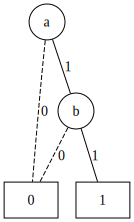

------------------------------------------
Satisfiable values for that expression are: 
[{a: 1, b: 1}]
------------------------------------------
------------------------------------------
Please enter the other expression


 a | b


------------------------------------------
The truth table for the first expression: 
b a
0 0 : 0
0 1 : 1
1 0 : 1
1 1 : 1

------------------------------------------


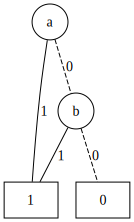

------------------------------------------
Satisfiable values for that expression are: 
[{a: 1, b: 1}, {a: 1, b: 0}, {a: 0, b: 1}]
------------------------------------------
Those two expressions are NOT equivalent!


In [10]:
#first test case
#Not equivilant
x=enterExpression()

Enter the expression you want


 A & B | B & C | C & A | ~A | B


------------------------------------------
The truth table for the first expression: 
C B A
0 0 0 : 1
0 0 1 : 0
0 1 0 : 1
0 1 1 : 1
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 1

------------------------------------------


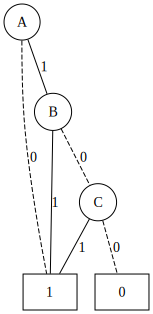

------------------------------------------
Satisfiable values for that expression are: 
[{A: 0}, {C: 1, B: 0, A: 1}, {B: 1, A: 1}]
------------------------------------------
------------------------------------------
Please enter the other expression


 ~A | B | C


------------------------------------------
The truth table for the first expression: 
C B A
0 0 0 : 1
0 0 1 : 0
0 1 0 : 1
0 1 1 : 1
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 1

------------------------------------------


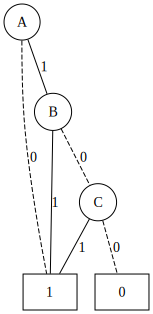

------------------------------------------
Satisfiable values for that expression are: 
[{A: 0, B: 1, C: 1}, {A: 0, B: 1, C: 0}, {A: 0, B: 0, C: 1}, {A: 0, B: 0, C: 0}, {A: 1, B: 0, C: 1}, {A: 1, B: 1, C: 0}, {A: 1, B: 1, C: 1}]
------------------------------------------
Those two expressions are equivalent!


In [142]:
#second test case
#equivilant
x=enterExpression()

Enter the expression you want


 ~A | B | C


------------------------------------------
The truth table for the first expression: 
C B A
0 0 0 : 1
0 0 1 : 0
0 1 0 : 1
0 1 1 : 1
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 1

------------------------------------------


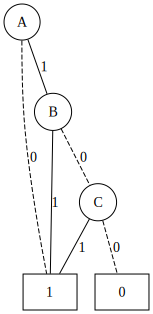

------------------------------------------
Satisfiable values for that expression are: 
[{A: 0, B: 1, C: 1}, {A: 0, B: 1, C: 0}, {A: 0, B: 0, C: 1}, {A: 0, B: 0, C: 0}, {A: 1, B: 0, C: 1}, {A: 1, B: 1, C: 0}, {A: 1, B: 1, C: 1}]
------------------------------------------
------------------------------------------
Please enter the other expression


 A & C & ~B | ~A & C 


------------------------------------------
The truth table for the first expression: 
C B A
0 0 0 : 0
0 0 1 : 0
0 1 0 : 0
0 1 1 : 0
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 0

------------------------------------------


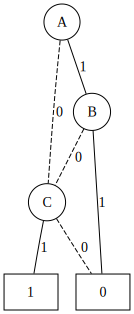

------------------------------------------
Satisfiable values for that expression are: 
[{C: 1, A: 0}, {C: 1, B: 0, A: 1}]
------------------------------------------
Those two expressions are NOT equivalent!


In [143]:
#third test case
#Not equivilant
x=enterExpression()

Enter the expression you want


 A & B | B & C | C & A | ~A | B & ~C & ~A


------------------------------------------
The truth table for the first expression: 
C B A
0 0 0 : 1
0 0 1 : 0
0 1 0 : 1
0 1 1 : 1
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 1

------------------------------------------


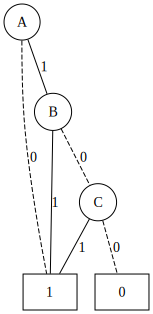

------------------------------------------
Satisfiable values for that expression are: 
[{A: 0}, {C: 1, B: 0, A: 1}, {B: 1, A: 1}]
------------------------------------------
------------------------------------------
Please enter the other expression


 ~A | B | C


------------------------------------------
The truth table for the first expression: 
C B A
0 0 0 : 1
0 0 1 : 0
0 1 0 : 1
0 1 1 : 1
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 1

------------------------------------------


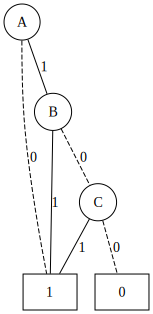

------------------------------------------
Satisfiable values for that expression are: 
[{A: 0, B: 1, C: 1}, {A: 0, B: 1, C: 0}, {A: 0, B: 0, C: 1}, {A: 0, B: 0, C: 0}, {A: 1, B: 0, C: 1}, {A: 1, B: 1, C: 0}, {A: 1, B: 1, C: 1}]
------------------------------------------
Those two expressions are equivalent!


In [144]:
#fourth test case
#equivilant
x=enterExpression()

Enter the expression you want


 M & E & S | S | ~M & S | E


------------------------------------------
The truth table for the first expression: 
S E M
0 0 0 : 0
0 0 1 : 0
0 1 0 : 1
0 1 1 : 1
1 0 0 : 1
1 0 1 : 1
1 1 0 : 1
1 1 1 : 1

------------------------------------------


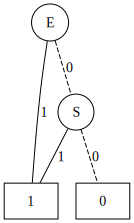

------------------------------------------
Satisfiable values for that expression are: 
[{S: 1, E: 0, M: 0}, {E: 1, M: 0}, {S: 1, E: 0, M: 1}, {E: 1, M: 1}]
------------------------------------------
------------------------------------------
Please enter the other expression


 S | E


------------------------------------------
The truth table for the first expression: 
S E
0 0 : 0
0 1 : 1
1 0 : 1
1 1 : 1

------------------------------------------


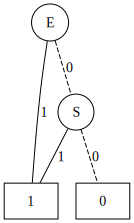

------------------------------------------
Satisfiable values for that expression are: 
[{E: 1, S: 1}, {E: 1, S: 0}, {E: 0, S: 1}]
------------------------------------------
Those two expressions are equivalent!


In [145]:
#fifth test case
#equivilant
x=enterExpression()